In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.cluster import KMeans

dfs = pd.read_csv('Student Stress Factors (2).csv')


dfs

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3
...,...,...,...,...,...,...
515,3,2,4,2,3,1
516,2,4,3,2,1,2
517,2,3,5,1,5,2
518,3,4,3,5,2,5


In [10]:
# Normalisasi nilai pada dataframe

dfs = ((dfs-dfs.min()) / (dfs.max() - dfs.min())) * 10 + 1

dfs

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,6.0,1.0,6.0,8.5,3.5,6.0
1,8.5,1.0,3.5,6.0,6.0,3.5
2,3.5,1.0,3.5,1.0,8.5,8.5
3,6.0,3.5,6.0,3.5,6.0,6.0
4,3.5,6.0,1.0,11.0,11.0,6.0
...,...,...,...,...,...,...
515,6.0,3.5,8.5,3.5,6.0,1.0
516,3.5,8.5,6.0,3.5,1.0,3.5
517,3.5,6.0,11.0,1.0,11.0,3.5
518,6.0,8.5,6.0,11.0,3.5,11.0


In [11]:
dfs.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,6.312500,3.956731,6.817308,5.375000,5.206731,5.687500
std,2.747558,3.118648,2.652895,3.430953,3.676863,3.394563
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,1.000000,6.000000,3.500000,1.000000,3.500000
50%,6.000000,3.500000,6.000000,4.750000,6.000000,6.000000
75%,8.500000,6.000000,8.500000,8.500000,8.500000,8.500000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [39]:
def random_centroid(dfs, k):
    centroids = []
    for i in range(k):
        centroid = dfs.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = random_centroid(dfs, 3)

centroids

,0,1,2
Kindly Rate your Sleep Quality 😴,3.5,8.5,6.0
How many times a week do you suffer headaches 🤕?,11.0,1.0,3.5
How would you rate you academic performance 👩‍🎓?,11.0,8.5,6.0
how would you rate your study load?,11.0,3.5,1.0
How many times a week you practice extracurricular activities 🎾?,6.0,11.0,3.5
How would you rate your stress levels?,6.0,1.0,11.0


In [40]:
def get_clusters(dfs, centroids):
    euclideanDis = centroids.apply(lambda x: np.sqrt(((dfs - x)**2).sum(axis=1)))
    return euclideanDis.idxmin(axis=1)

clusters = get_clusters(dfs, centroids)

clusters.value_counts()

2    275
1    160
0     85
dtype: int64

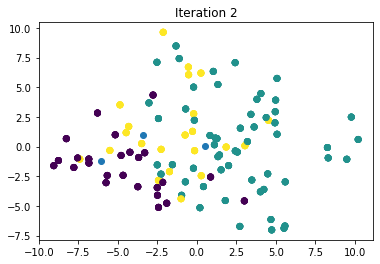

In [41]:
def new_centroids(dfs, clusters, k):
    centroids = dfs.groupby(clusters).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

def clusters_plot(dfs, clusters, centroids, iteration):
    pca = PCA(n_components=2)
    dfs2D = pca.fit_transform(dfs)
    centroids2D = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=dfs2D[:,0], y=dfs2D[:,1], c=clusters)
    plt.scatter(x=centroids2D[:,0], y=centroids2D[:,1])
    plt.show()
    
max_iter = 3
centroid_count = 3

centroids = random_centroid(dfs, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iter and not centroids.equals(old_centroids):
    old_centroids = centroids
    clusters = get_clusters(dfs, centroids)
    centroids = new_centroids(dfs, clusters, centroid_count)
    clusters_plot(dfs, clusters, centroids, iteration)
    iteration += 1

In [42]:
centroids

,0,1,2
Kindly Rate your Sleep Quality 😴,6.310971,6.481794,3.122904
How many times a week do you suffer headaches 🤕?,5.624897,2.329661,1.841340
How would you rate you academic performance 👩‍🎓?,4.554506,8.003117,4.002301
how would you rate your study load?,2.001447,6.035846,3.056637
How many times a week you practice extracurricular activities 🎾?,1.650463,4.781469,4.430039
How would you rate your stress levels?,2.786364,5.371664,4.060063


In [43]:
clusters.value_counts()

1    285
0    125
2    110
dtype: int64

In [44]:
Kmeans = KMeans(3)
Kmeans.fit(dfs)

pd.DataFrame(Kmeans.cluster_centers_, columns=dfs.columns).T

,0,1,2
Kindly Rate your Sleep Quality 😴,6.348837,6.138889,6.5
How many times a week do you suffer headaches 🤕?,4.081395,4.472222,3.0
How would you rate you academic performance 👩‍🎓?,6.988372,5.791667,8.0
how would you rate your study load?,8.325581,2.875000,3.9
How many times a week you practice extracurricular activities 🎾?,5.593023,1.902778,9.3
How would you rate your stress levels?,8.151163,3.916667,4.0
